In [1]:
#Programa para o desenvolvimento do Desafio do Módulo 01 da disciplina FAM do bootcamp de MLE

In [2]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import google

In [3]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [4]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
arquivo_desafio= pd.read_csv(nome_do_arquivo)

In [5]:
#apresentando as 5 primeiras linhas do dataset
arquivo_desafio.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


**Características do dataset**

**1. No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

In [6]:
#quantas instâncias e atributos existem?
arquivo_desafio.shape

(17379, 17)

**2. Quantos tipos diferentes de dados existem no dataset do desafio?**

In [7]:
arquivo_desafio.info() #verificando os tipos de variáveis do arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [8]:
arquivo_desafio.describe() #verificando as características do dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Existem colunas com valores nulos?**

In [9]:
#verificando a existência de campos nulos em cada coluna
arquivo_desafio.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

**3. Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?**

In [10]:
(arquivo_desafio['temp'].isnull().sum()/ len(arquivo_desafio['temp']))*100

10.000575407100524

**4. Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?**

In [11]:
arquivo_desafio_ver2 = arquivo_desafio.dropna(subset = ['dteday']) #drop seleciona a coluna pra apagar, dropna seleciona os nulos, subset escolhe a coluna

In [12]:
arquivo_desafio_ver2.shape

(15641, 17)

**5. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?**

In [13]:
arquivo_desafio_ver2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
#ou pode encontrar o valor de mean de uma coluna assim
arquivo_desafio_ver2['temp'].mean()

0.4969259206597582

**6. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?** 

In [15]:
arquivo_desafio_ver2['windspeed'].std()


0.12230930508286268

**7. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday".
Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?**

In [16]:
arquivo_desafio_ver2['season'].value_counts() #value_counts conta a quantidade de valores exclusivos no item

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

**8. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?**

In [17]:
arquivo_desafio_ver3 = arquivo_desafio_ver2['dteday'].astype('datetime64[ns]') #convertendo para tipo datetime

In [18]:
arquivo_desafio_ver3.tail() #tail mostra por padrão as últimas 5 linhas do arquivo

17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

**9. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?**

*   Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 
*   **Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.**
*   Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
*   Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

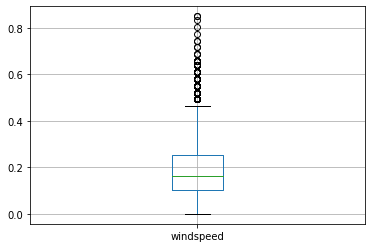

In [19]:
arquivo_desafio_ver2.boxplot(column=['windspeed']);


**10. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:**

*   **Possuem baixa correlação linear negativa.**
*   Possuem alta correlação linear positiva.
*   Possuem alta correlação linear negativa.
*   Possuem baixa correlação linear positiva.

In [20]:
import seaborn as sns
correlacao = arquivo_desafio_ver2[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()
corr = correlacao.corr()
corr.style.background_gradient(cmap='coolwarm')  #tudo pra plotar a matriz de correlação num mapa de calor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,season,temp,atemp,hum,windspeed,cnt
season,1.000000,0.311273,0.319559,0.146984,-0.149802,0.179190
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.179190,0.405867,0.403810,-0.323409,0.091747,1.000000



**11. Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.**

In [21]:
#substituindo os valores vazios por médios
import sklearn
from sklearn import linear_model
desafio_medios = arquivo_desafio_ver2[['hum','cnt', 'casual']].copy()
desafio_medios = desafio_medios.fillna(desafio_medios.mean())
desafio_medios

,hum,cnt,casual
1,0.80,40.0,8.000000
2,0.80,32.0,5.000000
3,0.75,13.0,3.000000
4,0.75,1.0,0.000000
5,0.75,1.0,0.000000
...,...,...,...
17373,0.48,122.0,10.000000
17374,0.60,119.0,11.000000
17375,0.60,89.0,35.416317
17377,0.56,61.0,13.000000


In [22]:
#verificando a existência de campos nulos em cada coluna
desafio_medios.isnull().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [23]:
x = desafio_medios[['hum','casual']] #variaveis independentes
Y = desafio_medios[['cnt']] #variavel dependente

In [24]:
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)
#realiza a previsão
previsao=reg.predict(x)
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
#parâmetros encontrados
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.4059859251122173


**12. Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".**

In [71]:
medio_hum = desafio_medios['hum'].mean()
medio_cnt = desafio_medios['cnt'].mean()
medio_casual = desafio_medios['casual'].mean()

In [73]:
desafio_medios["hum"].fillna(medio_hum, inplace = True)
desafio_medios["cnt"].fillna(medio_cnt, inplace = True)
desafio_medios["casual"].fillna(medio_casual, inplace = True)

In [74]:
X = desafio_medios[['hum','casual']].values #variaveis independentes
Y = desafio_medios[['cnt']].values #variavel dependente

In [76]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(criterion='gini')
model2 = tree.DecisionTreeRegressor()
model2.fit(X,Y)
model2.score(X,Y)


0.7098339715834964